In [1]:
from scipy.stats import bootstrap
import pandas as pd
import numpy as np 
import seaborn as sns

In [2]:
df = pd.read_csv('bootstrap_data.csv')

In [4]:
df.shape

(1254, 2)

In [5]:
df.group.unique()

array(['experimental', 'control'], dtype=object)

In [6]:
df.groupby('group', as_index=False).agg({'value': 'count'})

,group,value
0,control,760
1,experimental,494


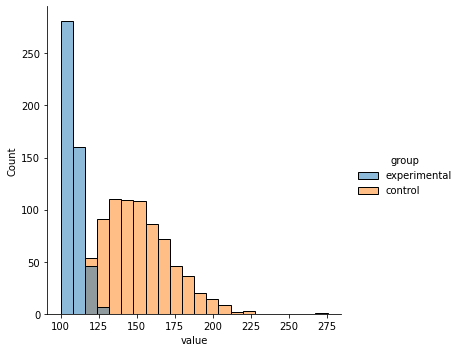

In [7]:
sns.displot(data=df, x="value", hue="group")

In [8]:
df.groupby('group', as_index=False).agg({'value': np.median})

,group,value
0,control,148.832127
1,experimental,106.982597


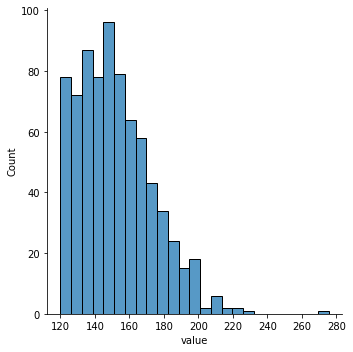

In [9]:
sns.displot(data=df[df.group == 'control'], x="value")

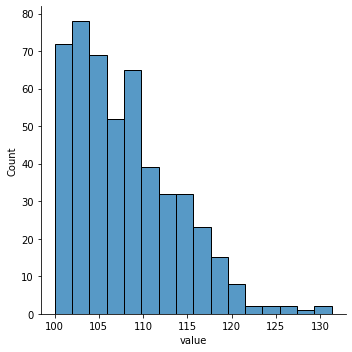

In [10]:
sns.displot(data=df[df.group == 'experimental'], x="value")

In [13]:
control_df = df[df.group == 'control']

In [14]:
control_df.value.median()

148.83212650911054

In [19]:
df_test = pd.DataFrame({'x' : [1, 2, 3, 4, 5, 6, 7, 8]})

In [20]:
df_test.sample(frac=1, replace=True)

,x
4,5
2,3
2,3
7,8
4,5
4,5
6,7
0,1


In [27]:
control_df.sample(frac=1, replace=True)

,value,group
1195,179.607776,control
1038,144.423228,control
554,121.201347,control
540,149.968966,control
517,161.830860,control
...,...,...
927,145.111207,control
927,145.111207,control
808,153.954723,control
583,140.049982,control


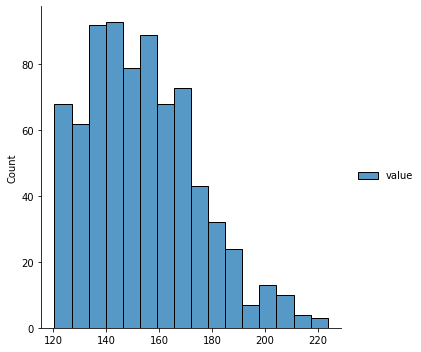

In [28]:
sns.displot(data = control_df.sample(frac=1, replace=True))

In [29]:
medians = []

In [30]:
n = 10000

In [31]:
for i in range(10000):
    sample_data = control_df.sample(frac=1, replace=True)
    sample_median = sample_data.value.median()
    medians.append(sample_median)

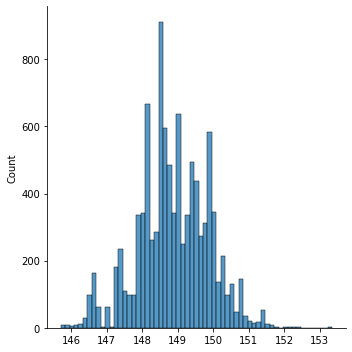

In [32]:
sns.displot(medians)

In [130]:
pd.Series(medians).quantile(0.975)

150.77638710063675

In [131]:
pd.Series(medians).quantile(0.025)

146.64531974830183

In [37]:
bootstrap((control_df.value, ), np.median)

BootstrapResult(confidence_interval=ConfidenceInterval(low=146.6382186333333, high=150.77637997981842), standard_error=0.9811352378433935)

In [34]:
exp_df = df[df.group == 'experimental']
median_diff = []

for i in range(10000):
    sample_data_control = control_df.sample(frac=1, replace=True)
    sample_median_control = sample_data_control.value.median()
    
    
    sample_data_exp = exp_df.sample(frac=1, replace=True)
    sample_median_exp = sample_data_exp.value.median()
    
    sample_median_diff = sample_median_control - sample_median_exp
    median_diff.append(sample_median_diff)

In [35]:
pd.Series(median_diff).quantile(0.975)

43.955165353260185

In [36]:
pd.Series(median_diff).quantile(0.025)

39.69801944180127